In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
# Read Dataset
hsdb = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/4105a4/Housing.csv')
cndb = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/4105a4/cancer.csv')

np.random.seed(0)

nmlz = StandardScaler()

In [12]:
#Problem 1, Cancer

def binary_map(x):
    return x.map({'B': 1, 'M': 0})
applyto =  ['diagnosis']

cndbtrain, cndbtest = train_test_split(cndb, train_size = 0.8, test_size = 0.2, random_state = 100)
cndbtrain[applyto] = cndbtrain[applyto].apply(binary_map)
cndbtest[applyto] = cndbtest[applyto].apply(binary_map)

trainexplanatory = nmlz.fit_transform(cndbtrain.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]].values)
traintruth = cndbtrain.iloc[:, 1].values

testexplanatory = nmlz.fit_transform(cndbtest.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]].values)
testtruth = cndbtest.iloc[:, 1].values



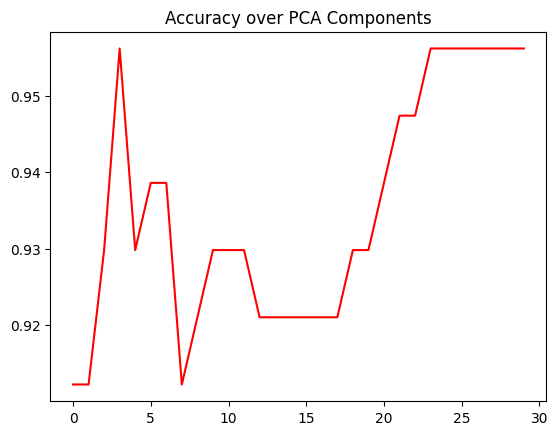

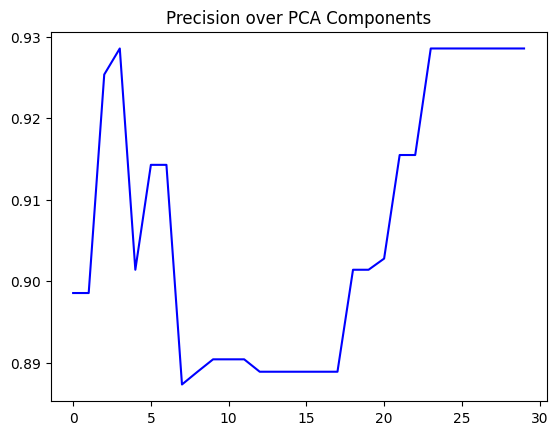

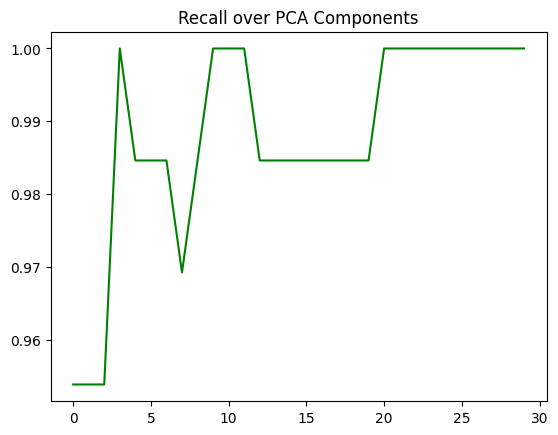

In [32]:
pcaArr = np.empty(30)
accuracyArr = np.empty(30)
precisionArr = np.empty(30)
recallArr = np.empty(30)
pcaArr[0] = 0


for n in range(1,30):
  pcaArr[n] = n
  pca = PCA(n_components=n)
  pcaSelectionTrain = pca.fit_transform(trainexplanatory)
  pcaSelectionTest = pca.fit_transform(testexplanatory)

  model = SVC(kernel='linear', class_weight='balanced')
  model.fit(pcaSelectionTrain, traintruth)

  predicttruth = model.predict(pcaSelectionTest)

  accuracyArr[n] = metrics.accuracy_score(testtruth, predicttruth)
  precisionArr[n] = metrics.precision_score(testtruth, predicttruth)
  recallArr[n] = metrics.recall_score(testtruth, predicttruth)

  #print('\n\n',n,' PCA components')
  #print(metrics.classification_report(testtruth, predicttruth))

#Define the 0 points as the 1 points to make graphs readable
accuracyArr[0] = accuracyArr[1]
precisionArr[0] = precisionArr[1]
recallArr[0] = recallArr[1]

plt.title("Accuracy over PCA Components")
plt.plot(pcaArr, accuracyArr, color="red")
plt.show()

plt.title("Precision over PCA Components")
plt.plot(pcaArr, precisionArr, color="blue")
plt.show()

plt.title("Recall over PCA Components")
plt.plot(pcaArr, recallArr, color="green")
plt.show()

In [37]:
#3 is the ideal number of PCA components
#now we experiment with kernels


pca = PCA(n_components=3)
pcaSelectionTrain = pca.fit_transform(trainexplanatory)
pcaSelectionTest = pca.fit_transform(testexplanatory)
model = SVC(kernel='linear', class_weight='balanced')
model.fit(pcaSelectionTrain, traintruth)
predicttruth = model.predict(pcaSelectionTest)
print("Linear Accuracy: " + str(metrics.accuracy_score(testtruth, predicttruth)))

model = SVC(kernel='rbf', class_weight='balanced')
model.fit(pcaSelectionTrain, traintruth)
predicttruth = model.predict(pcaSelectionTest)
print("RBF Accuracy: " + str(metrics.accuracy_score(testtruth, predicttruth)))

model = SVC(kernel='poly', class_weight='balanced')
model.fit(pcaSelectionTrain, traintruth)
predicttruth = model.predict(pcaSelectionTest)
print("Poly Accuracy: " + str(metrics.accuracy_score(testtruth, predicttruth)))

model = SVC(kernel='sigmoid', class_weight='balanced')
model.fit(pcaSelectionTrain, traintruth)
predicttruth = model.predict(pcaSelectionTest)
print("Sigmoid Accuracy: " + str(metrics.accuracy_score(testtruth, predicttruth)))


Linear Accuracy: 0.956140350877193
RBF Accuracy: 0.9298245614035088
Poly Accuracy: 0.9035087719298246
Sigmoid Accuracy: 0.9035087719298246


In [50]:
#Problem 2
df_train, df_test = train_test_split(hsdb, train_size = 0.8, test_size = 0.2, random_state = 100)

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

def trinary_map(x):
    return x.map({'unfurnished': 0, 'semi-furnished': 0.5, 'furnished' : 1})

binarymap =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
trinarymap = ['furnishingstatus']

df_train[binarymap] = df_train[binarymap].apply(binary_map)
df_test[binarymap] = df_test[binarymap].apply(binary_map)

df_train[trinarymap] = df_train[trinarymap].apply(trinary_map)
df_test[trinarymap] = df_test[trinarymap].apply(trinary_map)

truth_train = df_train.values[:, 0]
records_train = len(truth_train)
bias_train = np.ones((records_train, 1))

truth_val = df_test.values[:, 0]
records_val = len(truth_val)
bias_val = np.ones((records_val, 1))

num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

df_stdt = df_train
Standard = StandardScaler()
df_stdt[num_vars] = Standard.fit_transform(df_train[num_vars])

df_stdv = df_test
df_stdv[num_vars] = Standard.fit_transform(df_test[num_vars])

area_train = df_stdt.values[:, 1].reshape(records_train, 1)
beds_train = df_stdt.values[:, 2].reshape(records_train, 1)
baths_train = df_stdt.values[:, 3].reshape(records_train, 1)
stories_train = df_stdt.values[:, 4].reshape(records_train, 1)
parking_train = df_stdt.values[:, 10].reshape(records_train, 1)
mainrd_train = df_stdt.values[:, 5].reshape(records_train, 1)
guest_train = df_stdt.values[:, 6].reshape(records_train, 1)
basement_train = df_stdt.values[:, 7].reshape(records_train, 1)
hotwater_train = df_stdt.values[:, 8].reshape(records_train, 1)
hvac_train = df_stdt.values[:, 9].reshape(records_train, 1)
prefarea_train = df_stdt.values[:, 11].reshape(records_train, 1)

area_val = df_stdv.values[:, 1].reshape(records_val, 1)
beds_val = df_stdv.values[:, 2].reshape(records_val, 1)
baths_val = df_stdv.values[:, 3].reshape(records_val, 1)
stories_val = df_stdv.values[:, 4].reshape(records_val, 1)
parking_val = df_stdv.values[:, 10].reshape(records_val, 1)
mainrd_val = df_stdv.values[:, 5].reshape(records_val, 1)
guest_val = df_stdv.values[:, 6].reshape(records_val, 1)
basement_val = df_stdv.values[:, 7].reshape(records_val, 1)
hotwater_val = df_stdv.values[:, 8].reshape(records_val, 1)
hvac_val = df_stdv.values[:, 9].reshape(records_val, 1)
prefarea_val = df_stdv.values[:, 11].reshape(records_val, 1)

trainexplanatory = np.hstack((bias_train, area_train, beds_train, baths_train, stories_train, parking_train, mainrd_train, guest_train, basement_train, hotwater_train, hvac_train, prefarea_train))
testexplanatory = np.hstack((bias_val, area_val, beds_val, baths_val, stories_val, parking_val, mainrd_val, guest_val, basement_val, hotwater_val, hvac_val, prefarea_val))

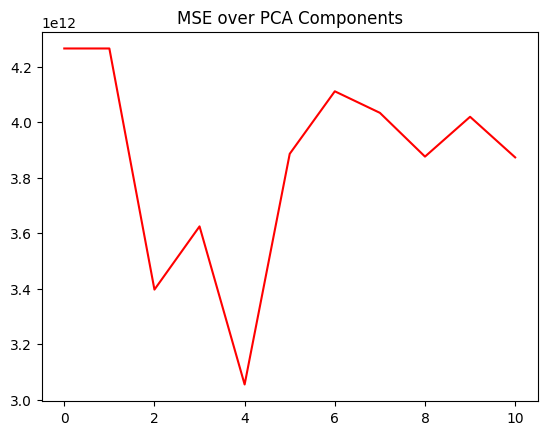

In [54]:
pcaArr = np.empty(11)
lossArr = np.empty(11)
pcaArr[0] = 0


for n in range(1,11):
  pcaArr[n] = n
  pca = PCA(n_components=n)
  pcaSelectionTrain = pca.fit_transform(trainexplanatory)
  pcaSelectionTest = pca.fit_transform(testexplanatory)

  model = SVC(kernel='linear', class_weight='balanced')
  model.fit(pcaSelectionTrain, truth_train)

  predicttruth = model.predict(pcaSelectionTest)

  lossArr[n] = metrics.mean_squared_error(truth_val, predicttruth, squared=True)

  #print('\n\n',n,' PCA components')
  #print(metrics.classification_report(testtruth, predicttruth))

#Define the 0 points as the 1 points to make graphs readable
lossArr[0] = lossArr[1]

plt.title("MSE over PCA Components")
plt.plot(pcaArr, lossArr, color="red")
plt.show()

In [57]:
#4 is the ideal number of PCA components
#now we experiment with kernels

pca = PCA(n_components=4)
pcaSelectionTrain = pca.fit_transform(trainexplanatory)
pcaSelectionTest = pca.fit_transform(testexplanatory)
model = SVC(kernel='linear', class_weight='balanced')
model.fit(pcaSelectionTrain, truth_train)
predicttruth = model.predict(pcaSelectionTest)
print("Linear MSE: " + str(metrics.mean_squared_error(truth_val, predicttruth, squared=True)))

model = SVC(kernel='rbf', class_weight='balanced')
model.fit(pcaSelectionTrain, truth_train)
predicttruth = model.predict(pcaSelectionTest)
print("RBF MSE: " + str(metrics.mean_squared_error(truth_val, predicttruth, squared=True)))

model = SVC(kernel='poly', class_weight='balanced')
model.fit(pcaSelectionTrain, truth_train)
predicttruth = model.predict(pcaSelectionTest)
print("Poly MSE: " + str(metrics.mean_squared_error(truth_val, predicttruth, squared=True)))

model = SVC(kernel='sigmoid', class_weight='balanced')
model.fit(pcaSelectionTrain, truth_train)
predicttruth = model.predict(pcaSelectionTest)
print("Sigmoid MSE: " + str(metrics.mean_squared_error(truth_val, predicttruth, squared=True)))

#RBF is best

Linear MSE: 3054946470183.4863
RBF MSE: 2924397883027.523
Poly MSE: 3377122931192.6606
Sigmoid MSE: 5599470504587.156
